# Glider Sections 

Plot some sections of interest.

In [1]:
from scipy.io import loadmat
import numpy as np
import xarray as xr

import glidertools as gt
import matplotlib.pylab as plt
from matplotlib.colors import BoundaryNorm

from cmocean import cm as cmo

import gsw

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/glidertools/mapping.py:1336: GliderToolsWarning: PyKrige is not installed. To enable the variogram function please run `pip install pykrige`. Variograms are required for sensible 2D interpolation.
  warnings.warn(message, category=GliderToolsWarning)


In [2]:
data_659 = '/Users/dhruvbalwada/work_root/sogos/data/interim/gliders/sg659/CTD_659.nc'
data_660 = '/Users/dhruvbalwada/work_root/sogos/data/interim/gliders/sg660/CTD_660.nc'

In [3]:
ds_659 = xr.load_dataset(data_659)
ds_660 = xr.load_dataset(data_660)

In [4]:
days = ds_659.time - np.datetime64('2019-01-01')
days_round_659 = (days / np.timedelta64(1, 'D')).round()

days = ds_660.time - np.datetime64('2019-01-01')
days_round_660 = (days / np.timedelta64(1, 'D')).round()

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


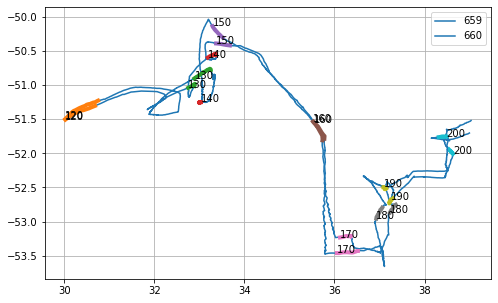

In [8]:
plt.figure(figsize = (8,5))

#plt.subplot(121)
plt.plot(ds_659.longitude, ds_659.latitude, label='659')

plt.legend()
days = np.linspace(120,200,9)
for i in days: 
    plt.plot(ds_659.longitude.where(days_round_659==i, drop=True), 
             ds_659.latitude.where(days_round_659==i, drop=True), linewidth=4)
    plt.text(ds_659.longitude.where(days_round_659==i, drop=True)[0], 
             ds_659.latitude.where(days_round_659==i, drop=True)[0], int(i))
    

#plt.subplot(122)
plt.plot(ds_660.longitude, ds_660.latitude, label='660')

plt.legend()
days = np.linspace(120,200,9)
for i in days: 
    plt.plot(ds_660.longitude.where(days_round_660==i, drop=True), 
             ds_660.latitude.where(days_round_660==i, drop=True), linewidth=4)
    plt.text(ds_660.longitude.where(days_round_660==i, drop=True)[0], 
             ds_660.latitude.where(days_round_660==i, drop=True)[0], int(i))    
    
plt.grid()

### Some plots in the straight region

In [6]:
dens_659 = gsw.sigma0(ds_659.salinity, ds_659.temperature)
dens_660 = gsw.sigma0(ds_660.salinity, ds_660.temperature)
ds_659['density'] = xr.DataArray(
            data=dens_659,
            coords=ds_659.coords,
            dims=ds_659.dims,
            name='density'
        )

ds_660['density'] = xr.DataArray(
            data=dens_660,
            coords=ds_660.coords,
            dims=ds_660.dims,
            name='density'
        )

Text(0.5, 1, 'Temp Data 660')

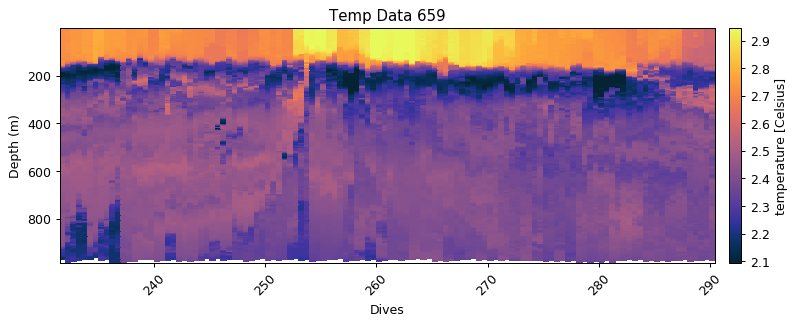

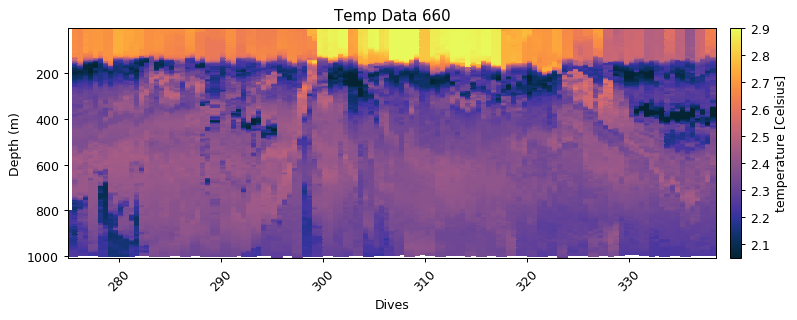

In [7]:
gt.plot(ds_659.dives.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.temperature.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')

gt.plot(ds_660.dives.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.temperature.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 660')

In [10]:
# Find avg lon/latitude over a certain dive numbers
# added for ease of plotting
# 659
temp = np.zeros_like(ds_659.latitude)

temp = xr.DataArray(
            data=temp,
            coords=ds_659.coords,
            dims=ds_659.dims,
            name='density'
        )

latitude_dive = temp.groupby(ds_659.dives) + ds_659.latitude.groupby(ds_659.dives).mean()
latitude_dive=latitude_dive.rename('latitude_dive')
longitude_dive = temp.groupby(ds_659.dives) + ds_659.longitude.groupby(ds_659.dives).mean()
longitude_dive = longitude_dive.rename('longitude_dive')

ds_659 = xr.merge([ds_659.assign_coords(dives=ds_659.dives), 
          latitude_dive, longitude_dive ])

# 660
temp = np.zeros_like(ds_660.latitude)

temp = xr.DataArray(
            data=temp,
            coords=ds_660.coords,
            dims=ds_660.dims,
            name='density'
        )

latitude_dive = temp.groupby(ds_660.dives) + ds_660.latitude.groupby(ds_660.dives).mean()
latitude_dive=latitude_dive.rename('latitude_dive')
longitude_dive = temp.groupby(ds_660.dives) + ds_660.longitude.groupby(ds_660.dives).mean()
longitude_dive = longitude_dive.rename('longitude_dive')

ds_660 = xr.merge([ds_660.assign_coords(dives=ds_660.dives), 
          latitude_dive, longitude_dive ])

(-53.5, -51.5)

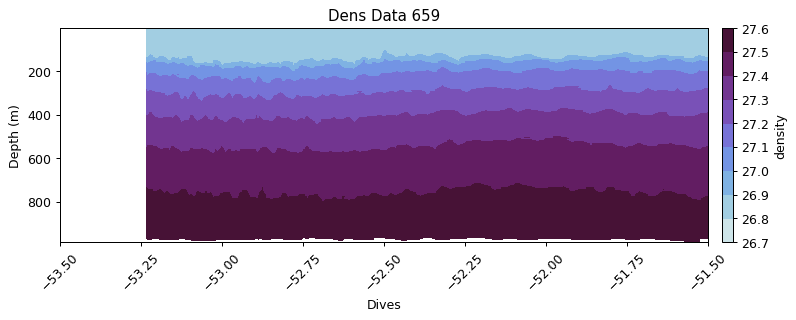

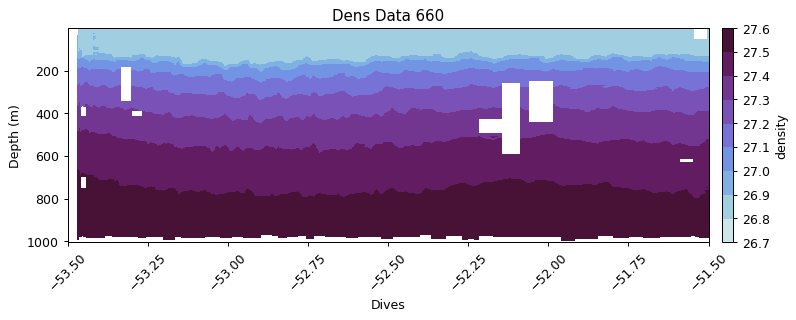

In [11]:
gt.plot.contourf(ds_659.latitude_dive.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.density.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.dense, levels=np.linspace(26.7, 27.6,10))
plt.title('Dens Data 659')
plt.xlim([-53.5, - 51.5])

gt.plot.contourf(ds_660.latitude_dive.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.density.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.dense, levels=np.linspace(26.7, 27.6,10))
plt.title('Dens Data 660')
plt.xlim([-53.5, - 51.5])


(500, 0)

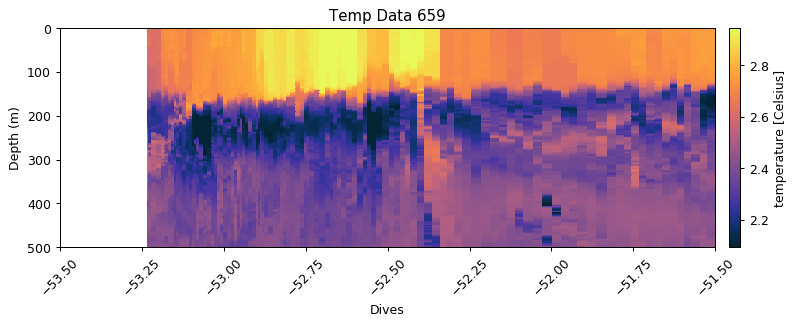

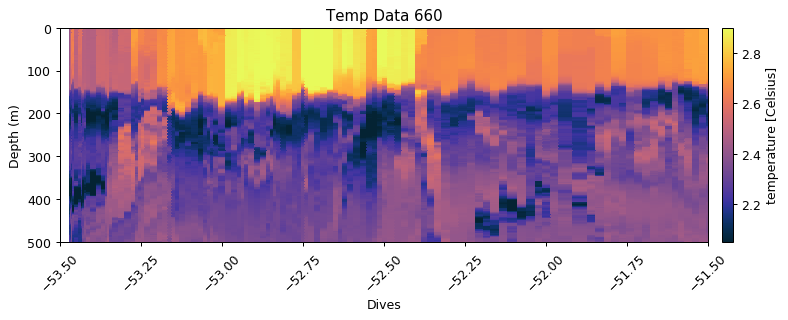

In [12]:
gt.plot(ds_659.latitude_dive.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.temperature.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')
plt.xlim([-53.5, - 51.5])
plt.ylim([500, 0])

gt.plot(ds_660.latitude_dive.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.temperature.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 660')
plt.xlim([-53.5, - 51.5])
plt.ylim([500, 0])
